In [1]:
import sys
import numpy as np
sys.path.append('../')
from deepod.models.time_series import AnomalyTransformer as model
from load_data import load_data
from deepod.metrics import ts_metrics
from deepod.metrics import point_adjustment 

In [2]:
train_imu,train_audio,train_spec,val_imu,val_audio,val_spec,val_imu_normal,val_audio_normal,val_spec_normal = load_data()

train_combine = np.concatenate([np.mean(train_audio,axis=-1),train_imu],axis=1)

test_audio_all = np.concatenate([val_audio_normal,val_audio],axis=0)
test_imu_all   = np.concatenate([val_imu_normal,val_imu],axis=0)
test_combine = np.concatenate([np.mean(test_audio_all,axis=-1),test_imu_all],axis=1)

labels_all = np.concatenate([np.zeros(val_audio_normal.shape[0]),np.ones(val_audio.shape[0])])

In [3]:
clf_imu = model(epochs=50,batch_size=4,seq_len=1,stride=1)
clf_imu.fit(train_imu)
clf_audio = model(epochs=50,batch_size=4,seq_len=1,stride=1)
clf_audio.fit(np.mean(train_audio,axis=-1))
clf_all = model(epochs=50,batch_size=4,seq_len=1,stride=1)
clf_all.fit(train_combine)

epoch  1, training loss: 0.290507, time: 0.3s
epoch  2, training loss: 0.011946, time: 0.1s
epoch  3, training loss: 0.007641, time: 0.1s
epoch  4, training loss: 0.009584, time: 0.1s
epoch  5, training loss: 0.008612, time: 0.1s
epoch  6, training loss: 0.011725, time: 0.1s
epoch  7, training loss: 0.010917, time: 0.1s
epoch  8, training loss: 0.009542, time: 0.1s
epoch  9, training loss: 0.010870, time: 0.1s
epoch 10, training loss: 0.010365, time: 0.1s
epoch 11, training loss: 0.008970, time: 0.1s
epoch 12, training loss: 0.008922, time: 0.1s
epoch 13, training loss: 0.008028, time: 0.1s
epoch 14, training loss: 0.008372, time: 0.1s
epoch 15, training loss: 0.009335, time: 0.2s
epoch 16, training loss: 0.009119, time: 0.1s
epoch 17, training loss: 0.009185, time: 0.1s
epoch 18, training loss: 0.009030, time: 0.1s
epoch 19, training loss: 0.009674, time: 0.1s
epoch 20, training loss: 0.007195, time: 0.1s
epoch 21, training loss: 0.009762, time: 0.1s
epoch 22, training loss: 0.010317,

In [5]:
scores_audio      = clf_audio.decision_function(np.mean(test_audio_all,axis=-1))
scores_imu        = clf_imu.decision_function(test_imu_all)
scores_all        = clf_all.decision_function(test_combine)

(2008, 1, 8820)
(2008, 1, 400)
(2008, 1, 9220)


In [6]:
# auc, mean precision, F1, percision, recall
eval_metrics_audio = ts_metrics(labels_all, scores_audio)
eval_metrics_imu = ts_metrics(labels_all, scores_imu)
result_audio = eval_metrics_audio
result_imu = eval_metrics_imu
eval_metrics_all = ts_metrics(labels_all, scores_all)
result_all = eval_metrics_all

print(result_audio)
print(result_imu)
print(result_all)

(0.9500556552365762, 0.9252021866974237, 0.8829004480740957, 0.8757763975155279, 0.8901515151515151)
(0.8480757409622541, 0.8491353047575669, 0.7719249492459345, 0.9166666666666666, 0.6666666666666666)
(0.9209716407496014, 0.9055944296059416, 0.8283820992101707, 0.8469656992084432, 0.8106060606060606)


Text(0.5, 1.0, 'Reconstruction Loss Distribution')

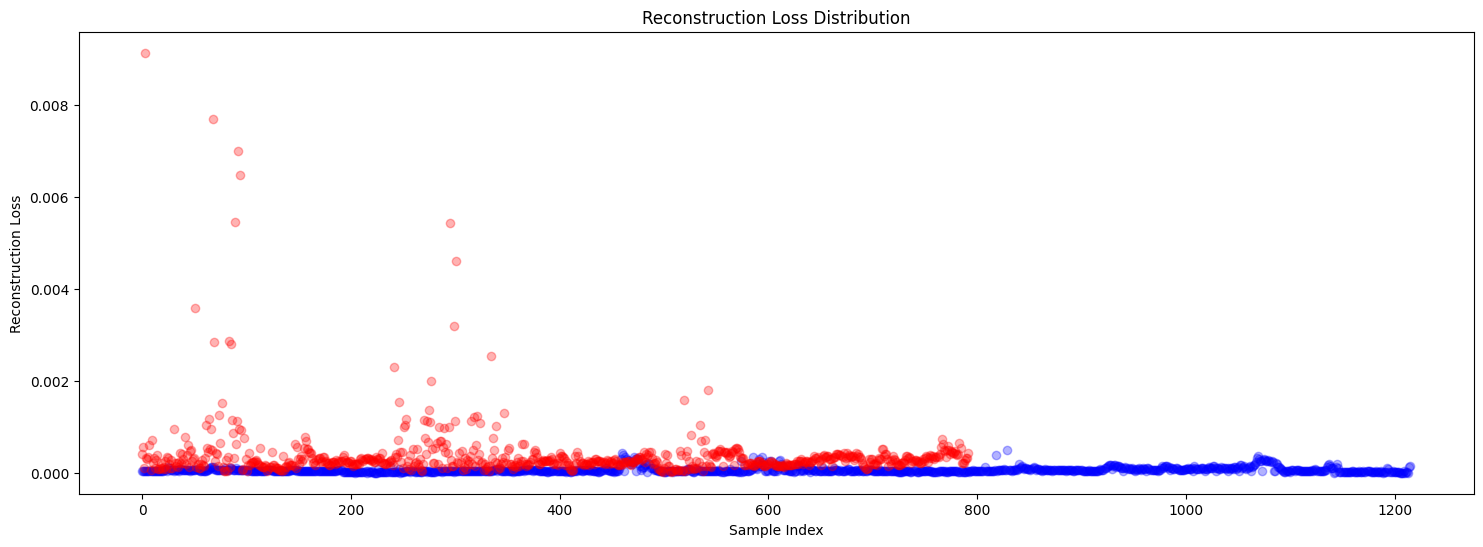

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18, 6))

plt.scatter(range(len(val_audio_normal)), scores_audio[:len(val_audio_normal)], color='blue', alpha=0.3, label='Train')
plt.scatter(range(len(val_audio)), scores_audio[len(val_audio_normal):], color='red', alpha=0.3, label='Validation')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Loss')
plt.title('Reconstruction Loss Distribution')
# plt.ylim(0,0.0004)
         







In [12]:
scores_all 

array([5.76272796e-05, 6.33320378e-05, 7.00109595e-05, ...,
       8.50247336e-04, 9.87368170e-04, 1.04536605e-03])